Свёрточная нейронная сеть (англ. convolutional neural network, CNN) — специальная архитектура искусственных нейронных сетей, предложенная Яном Лекуном в 1988 году и нацеленная на эффективное распознавание образов, входит в состав технологий глубокого обучения.  
Использует некоторые особенности зрительной коры, в которой были открыты так называемые простые клетки, реагирующие на прямые линии под разными углами, и сложные клетки, реакция которых связана с активацией определённого набора простых клеток.  
Таким образом, идея свёрточных нейронных сетей заключается в чередовании свёрточных слоёв и субдискретизирующих слоёв (слоёв подвыборки). Структура сети — однонаправленная (без обратных связей), принципиально многослойная.  
Для обучения используются стандартные методы, чаще всего метод обратного распространения ошибки. Функция активации нейронов (передаточная функция) — любая, по выбору исследователя.


Импорты

In [25]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import torch

In [26]:
from PIL import Image
import torchvision.transforms as transforms

Как уже сказано ранее, CNN нацелена на эффективное распознавание образов.  
Проведем эксперимент распознавания образов на датасете CIFAR10.

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Посмотрим на содержимое датасета

1. Тренировочные данные

In [51]:
print(x_train.shape)

(50000, 32, 32, 3)


In [4]:
print(y_train.shape)

(50000,)


2. Тестовые данные

In [5]:
print(x_test.shape)

(10000, 32, 32, 3)


In [6]:
print(y_test.shape)

(10000,)


3. Экземпляры датасета

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
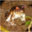

In [7]:
x_train[0]

In [8]:
y_train[0]

6

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
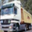

In [9]:
x_train[1]

In [10]:
y_train[1]

9

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]], dtype=uint8)
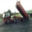

In [11]:
x_train[2]

In [12]:
y_train[2]

9

Сами экземпляры - картинки с различными объектами.  
Метки экземпляров - цифровая метка класса картинки (что именно изображено).

Классы, соответствующие цифровым меткам, по порядку, следующие:

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Стоит учесть, что:
1. Первый слой свертки ожидает тензор 50000х32х32х1, а не 50000 тензоров 32х32х1.
2. Сверточные нейронные сети лучше работают при нормализации входных данных (от 0.0 до 1.0).  

Необходимый тензор мы уже имеем, выполним нормализацию.  


In [14]:
input_shape = (32, 32, 3)

x_train = x_train / 255.0
x_test = x_test / 255.0

Видим, что на текущий момент наши метки классов представляют из себя числа, соответствующие конкретному классу. Однако мы хотим решать задачу для категориальных объектов выборки.  
Применим One-Hot Encoding для представления меток классов.

In [15]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

Посмотрим, как теперь выглядят данные после применения преобразований

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


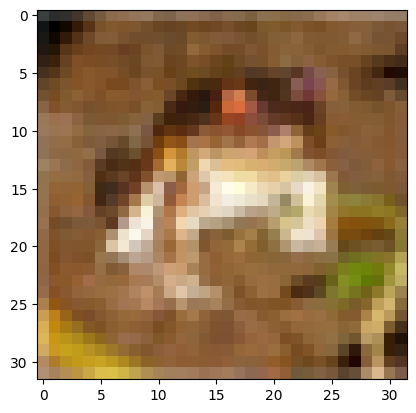

In [16]:
plt.imshow(x_train[0])

print(y_train[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


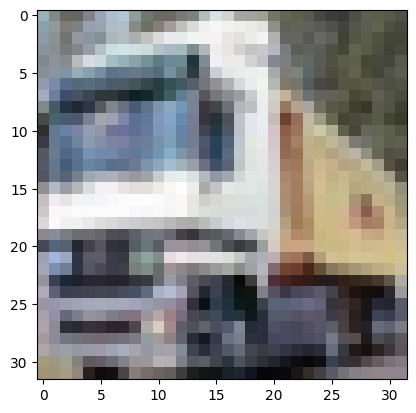

In [17]:
plt.imshow(x_train[1])

print(y_train[1])

Перейдем к основному этапу: обучение и тестирование модели.  
Зададим параметры сети и ее обучения.

In [18]:
batch_size = 32
num_classes = 10
epochs = 50

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
    loss='categorical_crossentropy',
    metrics=['acc']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Тренируем модель

In [20]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 161ms/step - acc: 0.2470 - loss: 2.0298
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 244s 156ms/step - acc: 0.4269 - loss: 1.5658
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 245s 157ms/step - acc: 0.4932 - loss: 1.4121
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 155ms/step - acc: 0.5336 - loss: 1.3015
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 241s 154ms/step - acc: 0.5664 - loss: 1.2180
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 153ms/step - acc: 0.5969 - loss: 1.1425
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 239s 153ms/step - acc: 0.6200 - loss: 1.0855
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 236s 151ms/step - acc: 0.6334 - loss: 1.0408
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 152ms/step - acc: 0.6520 - loss: 0.9961
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - acc: 0.6655 - loss: 0.9655
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 265s 154ms/step - acc: 0.6815 - loss: 0.9145
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━

Итого, оценим изменения Loss и Accuracy в процессе обучения

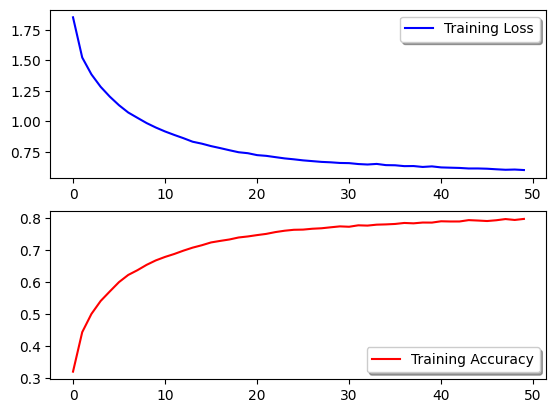

In [21]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='r', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Наконец, тестируем модель на тестовой выборке.  
Получим метрики тестирования.

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - acc: 0.7912 - loss: 0.6151


Далее, построим Confusion Matrix тестовой выборки

In [23]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)

# Сompute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

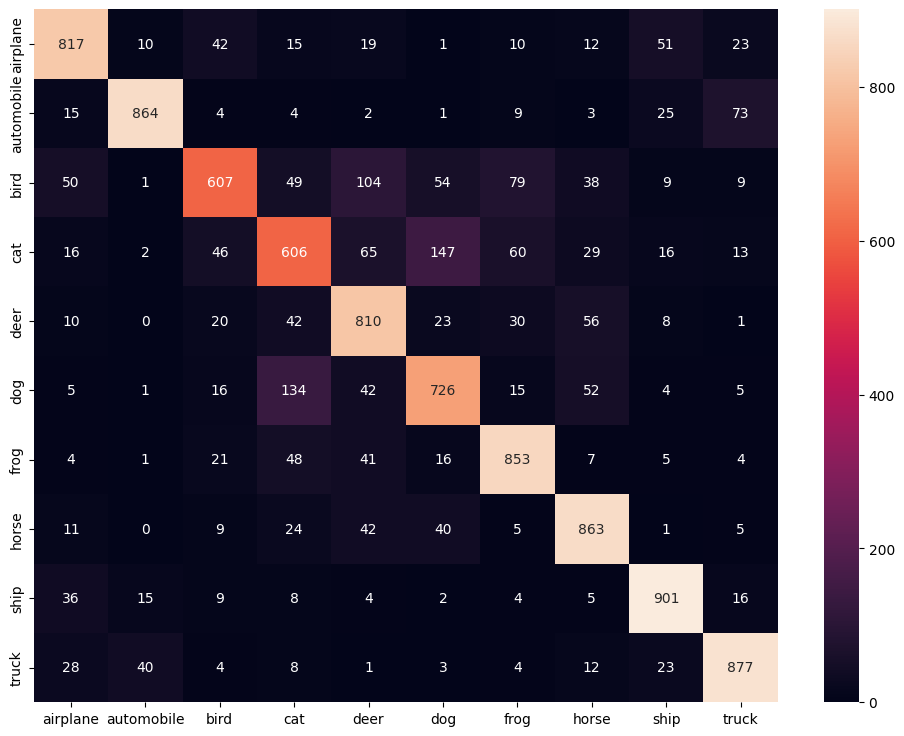

In [24]:
plt.figure(figsize=(12, 9))

c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

Из проведенного эксперимента можно сделать следующий вывод:  
Большинство неверных предсказаний сделаны именно при классификации животных, а также пары автомобиля и грузовика. Такие результаты объяснимы многими схожими чертами между объектами, на которых возникает ошибка классификации.

Попробуем протестировать нейронку на собственном изображении.  
Скачано изображение Porsche Panamera (класс: car), его и попробуем классифицировать.  
Сначала представим изображение как тензор.  

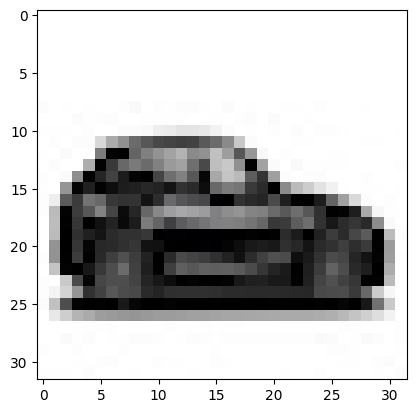

In [36]:
panamera = Image.open('./sample_data/example.jpeg')

plt.imshow(panamera)

Сначала представим изображение как NP array.

In [57]:
panamera_batch = np.expand_dims(panamera, axis=0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [252, 252, 252],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [252, 252, 252]]], dtype=uint8)
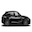

In [58]:
panamera_batch[0]

Посмотрим предсказанное значение экземпляра

In [59]:
model.predict(panamera_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Как видим, предсказан класс с индексом 1, соответствующий классу "automobile"